In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
file = pd.read_csv(r"data.txt", delimiter='\s+', header = None)
print(file)
x = file.iloc[:,0]
y = file.iloc[:,1]
sigma_y = file.iloc[:,2]
sigma_x = file.iloc[:,3]
rho_xy = file.iloc[:,4]

      0    1   2   3     4
0   201  592  61   9 -0.84
1   244  401  25   4  0.31
2    47  583  38  11  0.64
3   287  402  15   7 -0.27
4   203  495  21   5 -0.33
5    58  173  15   9  0.67
6   210  479  27   4 -0.02
7   202  504  14   4 -0.05
8   198  510  30  11 -0.84
9   158  416  16   7 -0.69
10  165  393  14   5  0.30
11  201  442  25   5 -0.46
12  157  317  52   5 -0.03
13  131  311  16   6  0.50
14  166  400  34   6  0.73
15  160  337  31   5 -0.52
16  186  423  42   9  0.90
17  125  334  26   8  0.40
18  218  533  16   6 -0.78
19  146  344  22   5 -0.56


## Q1. Fit data to $y = mx+b$ 

X shape: (16, 2)
Y shape: (16,)
C_inv shape: (16, 16)
info shape: (2, 2)
proj shape: (2,)
theta: [ 2.23992083 34.04772776]

 var in slope = 0.011616631123297421


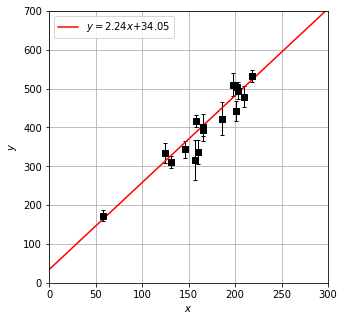

In [19]:
#we need to construct the following matrices: X, Y, C^-1, and solve for Theta

def get_params(x,y,sigma_y):
    
    #X
    dim = len(x)
    X = np.ones((dim,2))
    X[:,0] = x
    print('X shape:', X.shape)

    #Y
    Y = y
    print('Y shape:', Y.shape)

    #C_inv
    C_inv = np.zeros((dim, dim))
    var_inv = [1/s**2 for s in sigma_y]
    np.fill_diagonal(C_inv, var_inv)
    print('C_inv shape:', C_inv.shape)

    info_inv = np.matmul(np.matmul(np.transpose(X), C_inv), X) #information inverse matrix
    info = np.linalg.solve(info_inv, np.identity(2)) #solve(a,b) solves equation for x: Ax = b
    print('info shape:', info.shape)

    proj = np.matmul(np.matmul(np.transpose(X), C_inv), Y) #projection matrix
    print('proj shape:', proj.shape)

    Theta = np.matmul(info, proj)
    print('theta:', Theta)

    #calculate uncertainty in slope
    unc_matrix = np.linalg.solve(np.matmul(np.matmul(np.transpose(X), C_inv), X), np.identity(2))
    print('\n var in slope = {}'.format(unc_matrix[0][0]))
    
    return Theta

#############################################################################################################

Theta = get_params(x[4:],y[4:],sigma_y[4:])
m, b = Theta[0], Theta[1]
x_hat = np.linspace(0, 300)
y_hat = [x*m + b for x in x_hat]

fig, ax = plt.subplots(figsize = (5,5))
_= ax.errorbar(x[4:], y[4:], sigma_y[4:], fmt = 's',color = 'black', ecolor = 'black', elinewidth = 1, capsize=2)
_= ax.plot(x_hat, y_hat, 'r-', label = r'$y = {}x$'.format(round(m,2)) + '$+ {}$'.format(round(b,2)))

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

ax.legend()
ax.grid()

_= ax.set_xlim([0, 300])
_= ax.set_ylim([0, 700])

## Q2

X shape: (20, 2)
Y shape: (20,)
C_inv shape: (20, 20)
info shape: (2, 2)
proj shape: (2,)
theta: [  1.07674752 213.27349198]

 var in slope = 0.005991810080070377


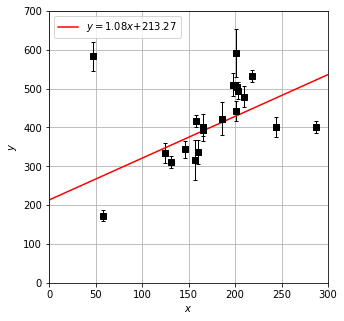

In [20]:
Theta = get_params(x,y,sigma_y)

m, b = Theta[0], Theta[1]
x_hat = np.linspace(0, 300)
y_hat = [x*m + b for x in x_hat]

fig, ax = plt.subplots(figsize = (5,5))
ax.errorbar(x, y, sigma_y, fmt = 's',color = 'black', ecolor = 'black', elinewidth = 1, capsize=2)
ax.plot(x_hat, y_hat, 'r-', label = r'$y = {}x$'.format(round(m,2)) + '$+ {}$'.format(round(b,2)))

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

ax.legend()
ax.grid()

_= ax.set_xlim([0, 300])
_= ax.set_ylim([0, 700])

#### In spite of a much "worse" fit, the variance of the slope is lower! Hence, the uncertainty does not adequately capture how "good" or "bad" the linear fit is. We can infer that a linear fit may not be the best option for this dataset.

## Q3. Perform Quadratic fit to data

Y shape: (16,)
C_inv shape: (16, 16)
info shape: (3, 3)
proj shape: (3,)
theta: [2.29888841e-03 1.59605045e+00 7.28946265e+01]


(0.0, 700.0)

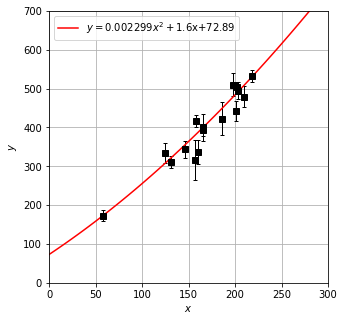

In [202]:
#X
dim = len(x[4:])
X = np.ones((dim,3))
X[:,1] = x[4:]
X[:,0] = [x**2 for x in x[4:]]

#Theta is now [q, m, b]

#Y is the same vector
Y = y[4:]
print('Y shape:', Y.shape)

#C_inv
C_inv = np.zeros((dim, dim))
var_inv = [1/s**2 for s in sigma_y[4:]]
np.fill_diagonal(C_inv, var_inv)
print('C_inv shape:', C_inv.shape)

info_inv = np.matmul(np.matmul(np.transpose(X), C_inv), X) #information inverse matrix
info = np.linalg.solve(info_inv, np.identity(3)) #solve(a,b) solves equation for x: Ax = b
print('info shape:', info.shape)

proj = np.matmul(np.matmul(np.transpose(X), C_inv), Y) #projection matrix
print('proj shape:', proj.shape)

Theta = np.matmul(info, proj)
print('theta:', Theta)

###############################################################################################################

q, m, b = Theta[0], Theta[1], Theta[2]
x_hat = np.linspace(0, 300)
y_hat = [q*x**2 + x*m + b for x in x_hat]
q = "{:3f}".format(q)

fig, ax = plt.subplots(figsize = (5,5))
ax.errorbar(x[4:], y[4:], sigma_y[4:], fmt = 's', color = 'black', ecolor = 'black', elinewidth = 1., capsize=2)

ax.plot(x_hat, y_hat, 'r-', label = r'$y = {}x^2+$'.format(q) + r'{}x'.format(round(m,2)) +\
        r'$+ {}$'.format(round(b,2)))

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$y$')

ax.legend()
ax.grid()

ax.set_xlim([0, 300])
ax.set_ylim([0, 700])

## Q8. Jacknife and Bootstrap Resampling

## a) Jacknife

#### resample datasets: each time, leave out one element. From that new set, get slope of the fit. Get uncertainty from list of slope values

In [275]:
x = file.iloc[:,0]
y = file.iloc[:,1]
sigma_y = file.iloc[:,2]

m_list = []

for i in range(len(x)):
    
    #resample by removing one datapoint
    x_resampled = x.drop([i])
    y_resampled = y.drop([i])
    sigma_y_resampled = sigma_y.drop([i])
    
    Theta = get_params(x_resampled,y_resampled,sigma_y_resampled)
    
    m_list.append(Theta[0])

print('average slope:',  np.mean(m_list))
print('variance in slope (sigma_m_sq):', np.std(m_list)**2)

average slope: 1.0752545538219032
variance in slope (sigma_m_sq): 0.040207688445794816


## b) Bootstrap

#### use a RNG to choose a set of N elements from an N-element dataset. Some numbers will duplicate, some won't show up. And then repeat as with jackknife

In [274]:
import random

M = 1000 #do bootstrap M times
m_list = []

for i in range(M):
    
    int_list = range(len(x))
    sample_list = random.choices(int_list, k=20)
#    print(sample_list) #<-- random assortment of indices

    x_resampled = [x.iloc[i] for i in sample_list]
    y_resampled = [y.iloc[i] for i in sample_list] 
    sigma_y_resampled = [sigma_y.iloc[i] for i in sample_list]

    Theta = get_params(x_resampled,y_resampled,sigma_y_resampled)
    
    m_list.append(Theta[0])

print('average slope:',  np.mean(m_list))
print('variance in slope (sigma_m_sq):', np.std(m_list)**2)

average slope: 1.067627409661718
variance in slope (sigma_m_sq): 0.38094327220340335


#### The jacknife uncertainty seems more suitable (a little surprising because it is a linear approximation of bootstrap, which is a more sophisticated method). 
#### The variances from jackknife and bootstrap are larger than those obtained initially in q1. This is because these are techniques that are used on resampled datasets that approximate to the real dataset.